In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [3]:
btc = pd.read_csv('BitstampUSD_2012-01-01_to_2020-09-14.csv')
btc.drop([0,1095],axis=0,inplace=True)
df=btc

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [5]:
df.head(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.490000,4.513333,4.490000,4.513333,31.620766,141.106779,4.498804
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
2012-01-05,6.281429,6.286190,6.281429,6.286190,4.514373,27.987370,6.284127
2012-01-06,6.435000,6.445000,6.435000,6.445000,2.420196,15.914659,6.438999
2012-01-07,6.800000,6.800000,6.800000,6.800000,0.295858,2.011834,6.800000
2012-01-08,6.950000,6.950000,6.950000,6.950000,2.500000,17.300000,6.950000


In [6]:
#3181
df.index=pd.date_range(start='2011-12-31',periods=3181,freq='D')
df.index


DatetimeIndex(['2011-12-31', '2012-01-01', '2012-01-02', '2012-01-03',
               '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-08', '2012-01-09',
               ...
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
               '2020-09-13', '2020-09-14'],
              dtype='datetime64[ns]', length=3181, freq='D')

In [7]:
df.tshift(1)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2012-01-01,4.490000,4.513333,4.490000,4.513333,31.620766,141.106779,4.498804
2012-01-02,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-03,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-04,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-05,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2020-09-11,10338.759708,10343.558552,10334.291588,10338.760864,7.119214,73621.083972,10339.359896
2020-09-12,10302.414327,10306.071361,10299.283936,10302.451926,3.660672,37706.667029,10303.242947
2020-09-13,10372.770434,10375.469839,10370.388713,10372.583252,1.754713,18200.013902,10373.259995
2020-09-14,10393.230099,10396.386007,10390.076996,10392.960134,3.056612,31635.949638,10393.662602


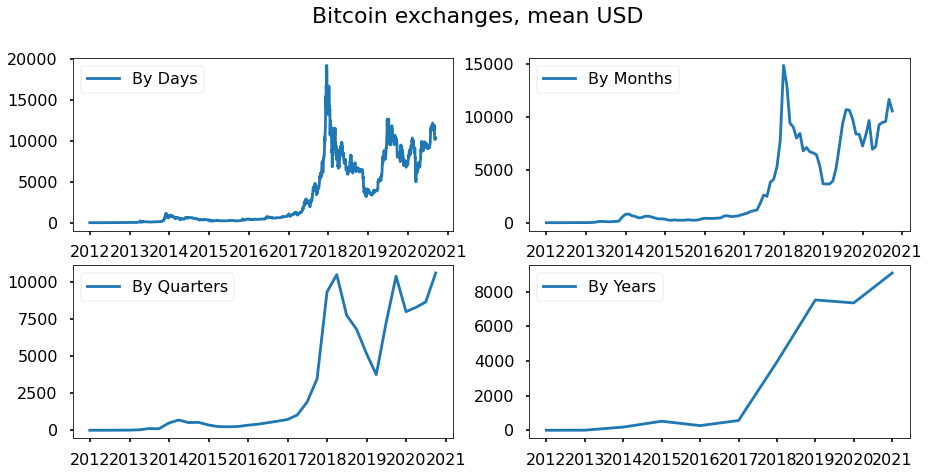

In [8]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Dickey–Fuller test: p=0.617866


<Figure size 1080x504 with 0 Axes>

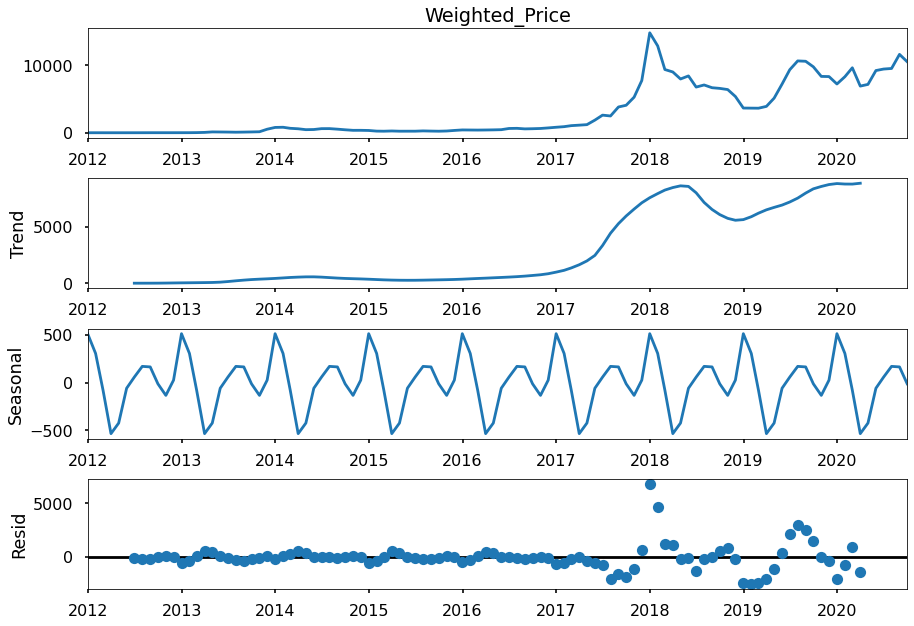

In [9]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])
plt.show()

In [10]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.617866


In [11]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.288907


Dickey–Fuller test: p=0.000002


<Figure size 1080x504 with 0 Axes>

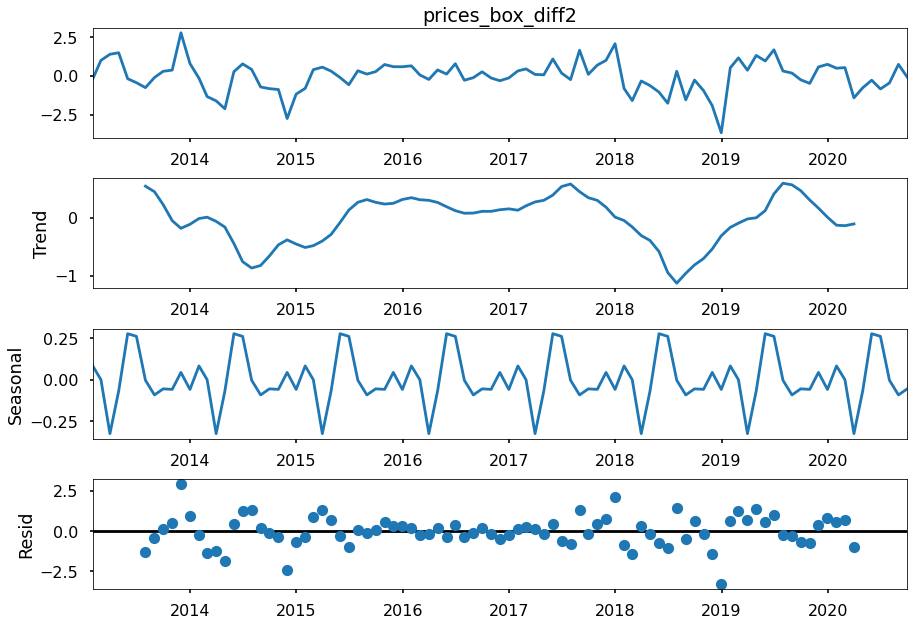

In [12]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

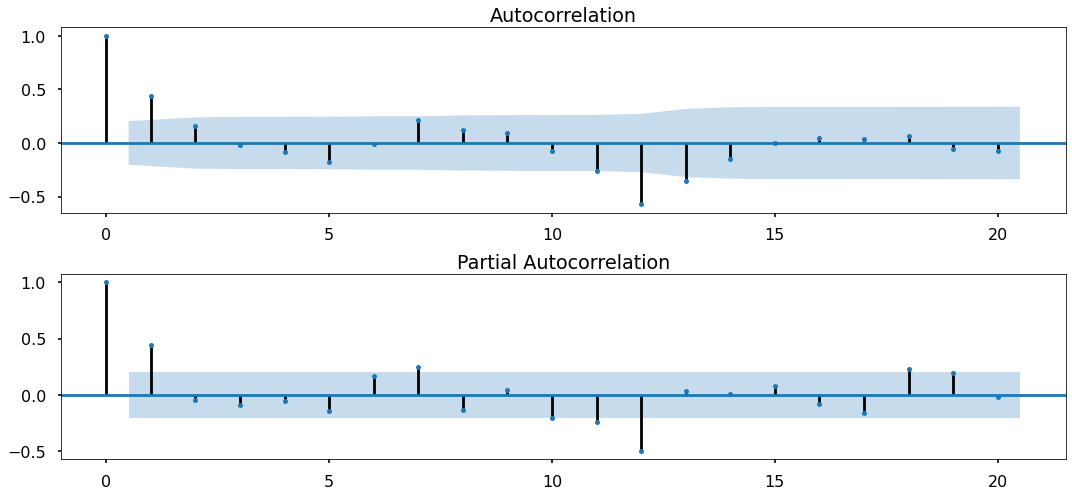

In [13]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=20, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=20, ax=ax)
plt.tight_layout()
plt.show()

In [14]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic]) 

In [15]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
11  (0, 1, 2, 1)  198.770908
23  (1, 0, 2, 1)  198.826934
19  (1, 0, 0, 1)  199.111565
21  (1, 0, 1, 1)  199.386610
7   (0, 1, 0, 1)  199.472393
                                     SARIMAX Results                                      
Dep. Variable:                 Weighted_Price_box   No. Observations:                  106
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 -94.385
Date:                            Mon, 07 Jun 2021   AIC                            198.771
Time:                                    11:54:07   BIC                            211.434
Sample:                                12-31-2011   HQIC                           203.884
                                     - 09-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

Dickey–Fuller test:: p=0.000000


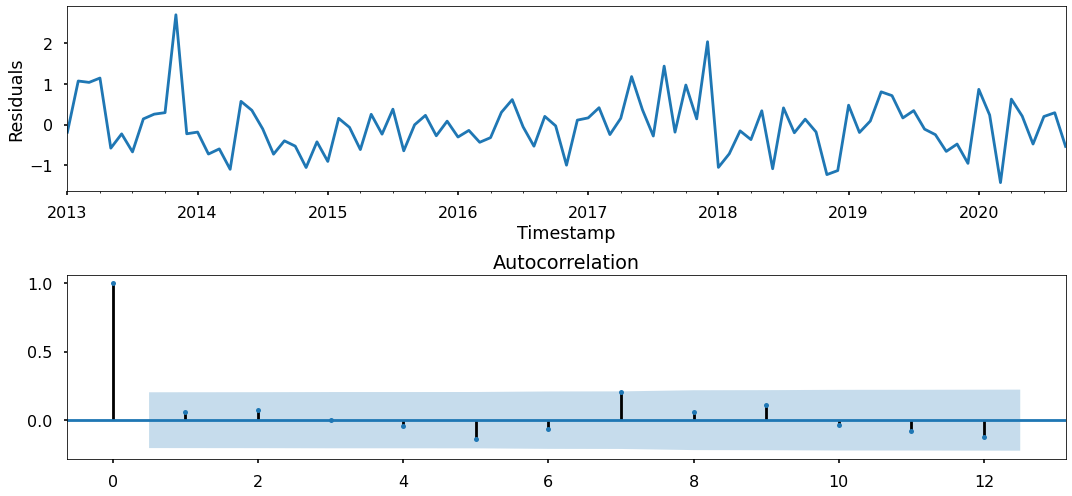

In [16]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [17]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

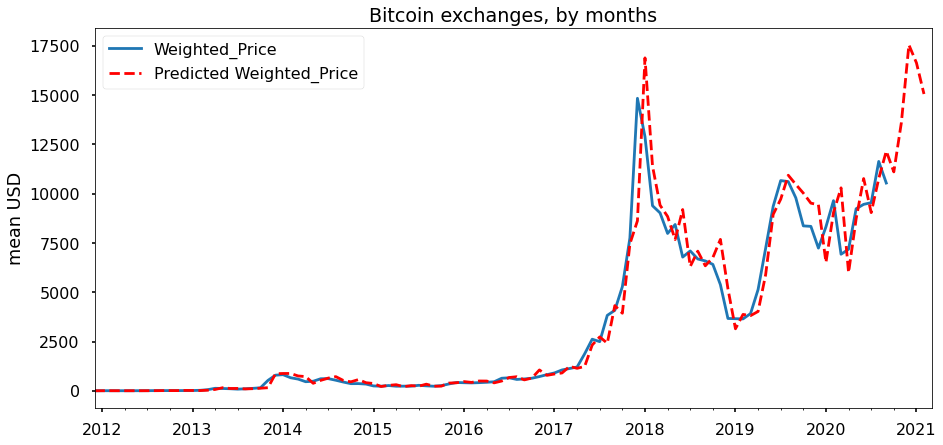

In [18]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [#datetime(2020, 2, 28),datetime(2020, 3, 31),datetime(2020, 4,30),datetime(2020,5,31),
             #datetime(2020, 6, 30),datetime(2020, 7, 30),datetime(2020, 8,30),datetime(2020,9,29),
            #datetime(2020, 6, 30),datetime(2020, 7, 31),datetime(2020, 8,31),datetime(2020,9,30),
    datetime(2020, 10, 31),datetime(2020, 11, 30),datetime(2020, 12,31),datetime(2021,1,31),
    datetime(2021, 2,28),datetime(2021,3,31)
]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2,future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=110), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [19]:
df_month2.head(10)

,Weighted_Price,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price_box,prices_box_diff,prices_box_diff2,forecast
2011-12-31,4.498804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
2012-01-31,6.208550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.498805
2012-02-29,5.252527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.208550
2012-03-31,4.962021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.252527
2012-04-30,4.976547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.962021
2012-05-31,5.041348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.976547
2012-06-30,5.971145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.041348
2012-07-31,7.795287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.971145
2012-08-31,10.917100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.795288
2012-09-30,11.410971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.917101


In [20]:
df_month2.forecast.shift(-1).tail(15)



2020-01-31     9047.075681
2020-02-29    10297.150245
2020-03-31     5998.129527
2020-04-30     8721.048217
2020-05-31    10768.249759
2020-06-30     9040.946060
2020-07-31    10766.874186
2020-08-31    12162.245768
2020-09-30    11107.295006
2020-10-31    13604.903597
2020-11-30    17550.507140
2020-12-31    16639.063792
2021-01-31    15057.753882
2021-02-28             NaN
2021-03-31             NaN
Name: forecast, dtype: float64

In [21]:
df_month2.Weighted_Price.tail(15)

2020-01-31     8321.725828
2020-02-29     9647.446186
2020-03-31     6929.254708
2020-04-30     7182.033733
2020-05-31     9236.327890
2020-06-30     9459.531635
2020-07-31     9545.436344
2020-08-31    11637.080012
2020-09-30    10541.968835
2020-10-31             NaN
2020-11-30             NaN
2020-12-31             NaN
2021-01-31             NaN
2021-02-28             NaN
2021-03-31             NaN
Name: Weighted_Price, dtype: float64

In [22]:
from sklearn import metrics

In [23]:
df_month2.Weighted_Price.dropna()

2011-12-31        4.498804
2012-01-31        6.208550
2012-02-29        5.252527
2012-03-31        4.962021
2012-04-30        4.976547
                  ...     
2020-05-31     9236.327890
2020-06-30     9459.531635
2020-07-31     9545.436344
2020-08-31    11637.080012
2020-09-30    10541.968835
Name: Weighted_Price, Length: 106, dtype: float64

In [24]:
df_month2.forecast.dropna()

2011-12-31        1.000000
2012-01-31        4.498805
2012-02-29        6.208550
2012-03-31        5.252527
2012-04-30        4.962021
                  ...     
2020-10-31    11107.295006
2020-11-30    13604.903597
2020-12-31    17550.507140
2021-01-31    16639.063792
2021-02-28    15057.753882
Name: forecast, Length: 111, dtype: float64

In [25]:
df_month2.Weighted_Price.dropna()
len(df_month2.Weighted_Price)
df_month2.Weighted_Price.max()

14840.260446081056

In [26]:
residuals=np.array(((df_month2.Weighted_Price-df_month2.forecast.shift(-1))**2))
residuals = residuals[~np.isnan(residuals)]
residuals_sum=sum(residuals)
from math import sqrt
rmse=sqrt(residuals_sum/106)
rmse

546.2795411351516